### My first model
This model classifies cheetah from lion, tiger and everything else

![](cheetah.png)

[](cheetah.png)

In [30]:
!pip install -Uqq fastai duckduckgo_search

In [31]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
  print(f"Searching for {term}")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [32]:
urls = search_images('cheetah photos', max_images=1)
urls[0]

Searching for cheetah photos


'http://blog.cincinnatizoo.org/wp-content/uploads/Cheetah-D0036.jpg'

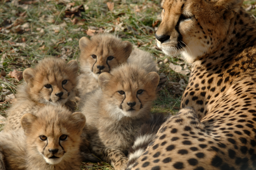

In [33]:
from fastdownload import download_url
dest = 'cheetah.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for tiger images


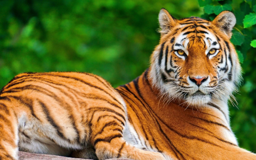

In [34]:
download_url(search_images('tiger images', 1)[0], 'tiger.jpg', show_progress=False)
Image.open('tiger.jpg').to_thumb(256, 256)


Searching for lion images


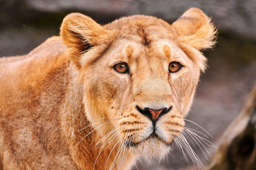

In [35]:
download_url(search_images('lion images', 1)[0], 'lion.jpg', show_progress=False)
Image.open('lion.jpg').to_thumb(256, 256)

In [36]:
searches = 'cheetah', 'tiger', 'lion'
path = Path('cheetah_or_not')
from time import sleep

for item in searches:
  dest = (path/item)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{item} photo'))
  sleep(10)
  resize_images(path/item, max_size = 400, dest=path/item)

Searching for cheetah photo
Searching for tiger photo
Searching for lion photo


In [37]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


0

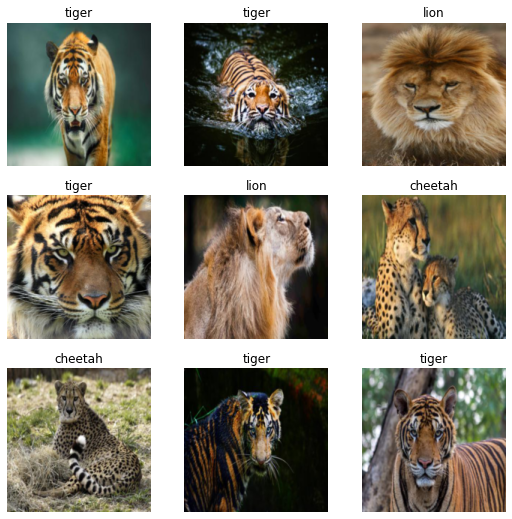

In [38]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192,method ='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n = 9)

In [39]:
learn = vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.581225,0.469961,0.187500,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.772286,0.240513,0.125000,00:00
1,0.429333,0.085089,0.000000,00:00
2,0.289199,0.067679,0.000000,00:00


In [46]:
is_cheetah,_,probs = learn.predict(PILImage.create('cheetah1.png'))
print(f"This is a {is_cheetah} {probs[0]}")


This is a cheetah 0.9688272476196289
